SVM - Support Vector Machine

SVR - Support Vector Regressor
SVC - Support Vector Classifier


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.svm import SVR

In [4]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.corr()['price']

car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

C:\Users\Hp Envy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='enginesize'>

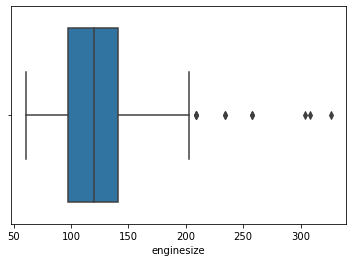

In [6]:
sns.boxplot(df['enginesize'])

C:\Users\Hp Envy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

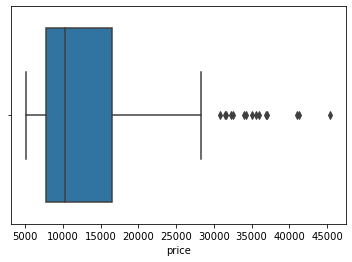

In [7]:
sns.boxplot(df['price'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [22]:
x = df[['price']]
y = df['boreratio']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=123)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [26]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

r2_score(y_test, y_pred_lr)

0.2616816045192367

In [27]:
svr_lr = SVR(kernel='linear')

In [28]:
svr_lr.fit(x_train, y_train)
y_pred_svr_lr = svr_lr.predict(x_test)

r2_score(y_test, y_pred_svr_lr)

-24860.41994543187

In [29]:
svr = SVR(kernel='rbf')

svr.fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)

r2_score(y_test, y_pred_svr)

0.5024953624580706

<AxesSubplot:xlabel='price', ylabel='Count'>

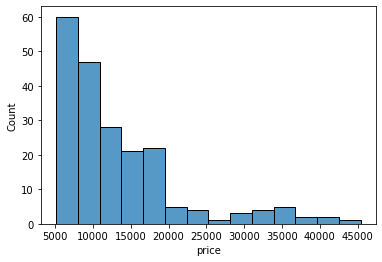

In [17]:
sns.histplot(df['price'])

<AxesSubplot:xlabel='price', ylabel='boreratio'>

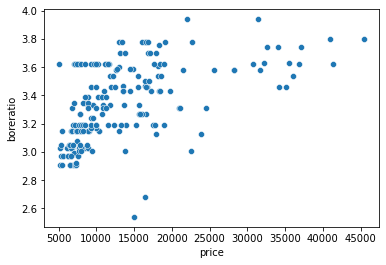

In [21]:
sns.scatterplot(data=df, x='price', y='boreratio')

In [20]:
df.corr()['price']

car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

In [30]:
df_numeric = df.select_dtypes(np.number)

In [31]:
df_numeric.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [32]:
df_numeric.corr()['price']

car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

In [34]:
df_numeric.drop(['car_ID', 'symboling', 'stroke', 'carheight', 'compressionratio', 'peakrpm'],axis=1, inplace=True)

In [35]:
df_numeric.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0


<AxesSubplot:>

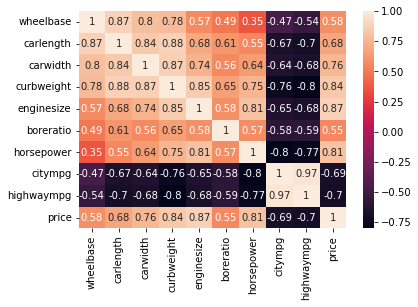

In [37]:
sns.heatmap(df_numeric.corr(), annot=True)

In [39]:
x = df_numeric.drop('price', axis=1)
y = df_numeric['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=123)

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

r2_score(y_test, y_pred_lr)

0.8092955722998318

In [42]:
svr = SVR(kernel='linear')

svr.fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)

r2_score(y_test, y_pred_svr)

0.824517399840784

C:\Users\Hp Envy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hp Envy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

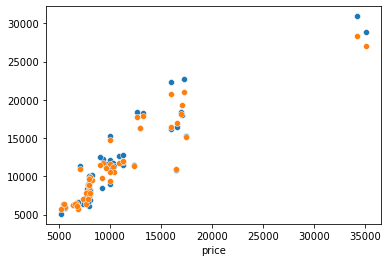

In [43]:
sns.scatterplot(y_test, y_pred_lr)
sns.scatterplot(y_test, y_pred_svr)

In [46]:
df_numeric['car_lenwid'] = (df_numeric['carwidth'] * df_numeric['carlength'])

In [47]:
df_numeric.corr()['price']

wheelbase     0.577816
carlength     0.682920
carwidth      0.759325
curbweight    0.835305
enginesize    0.874145
boreratio     0.553173
horsepower    0.808139
citympg      -0.685751
highwaympg   -0.697599
price         1.000000
car_lenwid    0.738052
Name: price, dtype: float64

In [48]:
df_numeric.drop(['carlength','carwidth'], axis=1, inplace=True)

In [49]:
df_numeric.head()

,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,car_lenwid
0,88.6,2548,130,3.47,111,21,27,13495.0,10820.08
1,88.6,2548,130,3.47,111,21,27,16500.0,10820.08
2,94.5,2823,152,2.68,154,19,26,16500.0,11213.60
3,99.8,2337,109,3.19,102,24,30,13950.0,11690.92
4,99.4,2824,136,3.19,115,18,22,17450.0,11726.24


In [50]:
df_numeric.drop(['boreratio'], axis=1, inplace=True)


In [52]:
df_numeric.head()

,wheelbase,curbweight,enginesize,horsepower,citympg,highwaympg,price,car_lenwid
0,88.6,2548,130,111,21,27,13495.0,10820.08
1,88.6,2548,130,111,21,27,16500.0,10820.08
2,94.5,2823,152,154,19,26,16500.0,11213.60
3,99.8,2337,109,102,24,30,13950.0,11690.92
4,99.4,2824,136,115,18,22,17450.0,11726.24


In [53]:
x = df_numeric.drop('price', axis=1)
y = df_numeric['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=123)

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

r2_score(y_test, y_pred_lr)

0.7942423148133555

In [54]:
svr = SVR(kernel='linear')

svr.fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)

r2_score(y_test, y_pred_svr)

0.8146256894341384

In [57]:
from sklearn.preprocessing import Normalizer

nr = Normalizer()

df_scaled = nr.fit_transform(df_numeric)

In [58]:
x = df_scaled[:,:-1]
y = df_scaled[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=123)

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

r2_score(y_test, y_pred_lr)

0.9867195919701097

In [61]:
svr = SVR(kernel='rbf')

svr.fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)

r2_score(y_test, y_pred_svr)

0.37095292040306294

C:\Users\Hp Envy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hp Envy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

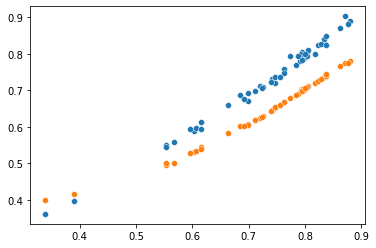

In [62]:
sns.scatterplot(y_test, y_pred_lr)
sns.scatterplot(y_test, y_pred_svr)

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
rf = RandomForestRegressor()

rf.fit(x_train, y_train)
y_pred_svr = rf.predict(x_test)

r2_score(y_test, y_pred_svr)

0.998511965588535

C:\Users\Hp Envy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

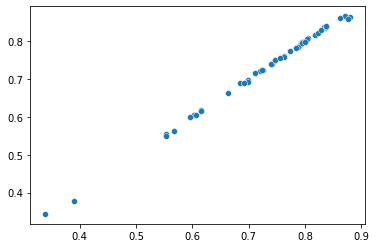

In [66]:
# sns.scatterplot(y_test, y_pred_lr)
sns.scatterplot(y_test, y_pred_svr)